# Visualizing Real Data

So - let's put these two concepts together! Let's use plotting functions so that we don't have to look at these big data frames by hand, but can examine them visually to look for interesting patterns.

First let's load in the "penguins" data set (<https://github.com/allisonhorst/palmerpenguins>)

This is a dataset which is useful for understanding plotting and manipulating data. 

It's data collected by Dr. Kristen Gorman and the Palmer Station, Antarctica on penguin ecology.  The dataset contains information for phenotypes of 344 penguins, with 3 different penguin species.

We've provided this data as Excel file - it can be loaded with pandas - as long as you _first_ install the depednency `openpyxl` with `mamba install openpyxl`

In [1]:
import pandas as pd

In [2]:
%cd ../data

/home/fzhong3/bcmb_bootcamp/day4/data


In [3]:
!ls

TECANgrowth.csv  cefamandole.csv  enzyme.txt  penguin.xlsx


In [4]:
penguin=pd.read_excel('penguin.xlsx')
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's filter out the rows that don't have values (the nan values)

In [5]:
penguin=penguin[penguin.sex.notnull()]
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Now, let's start by just plotting - for example - the length of their flippers vs their body mass.  How would we do that from this dataset?  We'll use `plotnine` <https://plotnine.readthedocs.io/en/stable/> which uses something called the "grammar of graphics" to generate plots.  It works similar to matplotib, but with perhaps an easier interface for working with datasets. This was originally derived from R, but lifted over to python by the plotnine team.

In [6]:
import matplotlib.pyplot as plt
import plotnine as p9

First - let's tell plotnine where to find the data - the main plotting funciton is `ggplot`

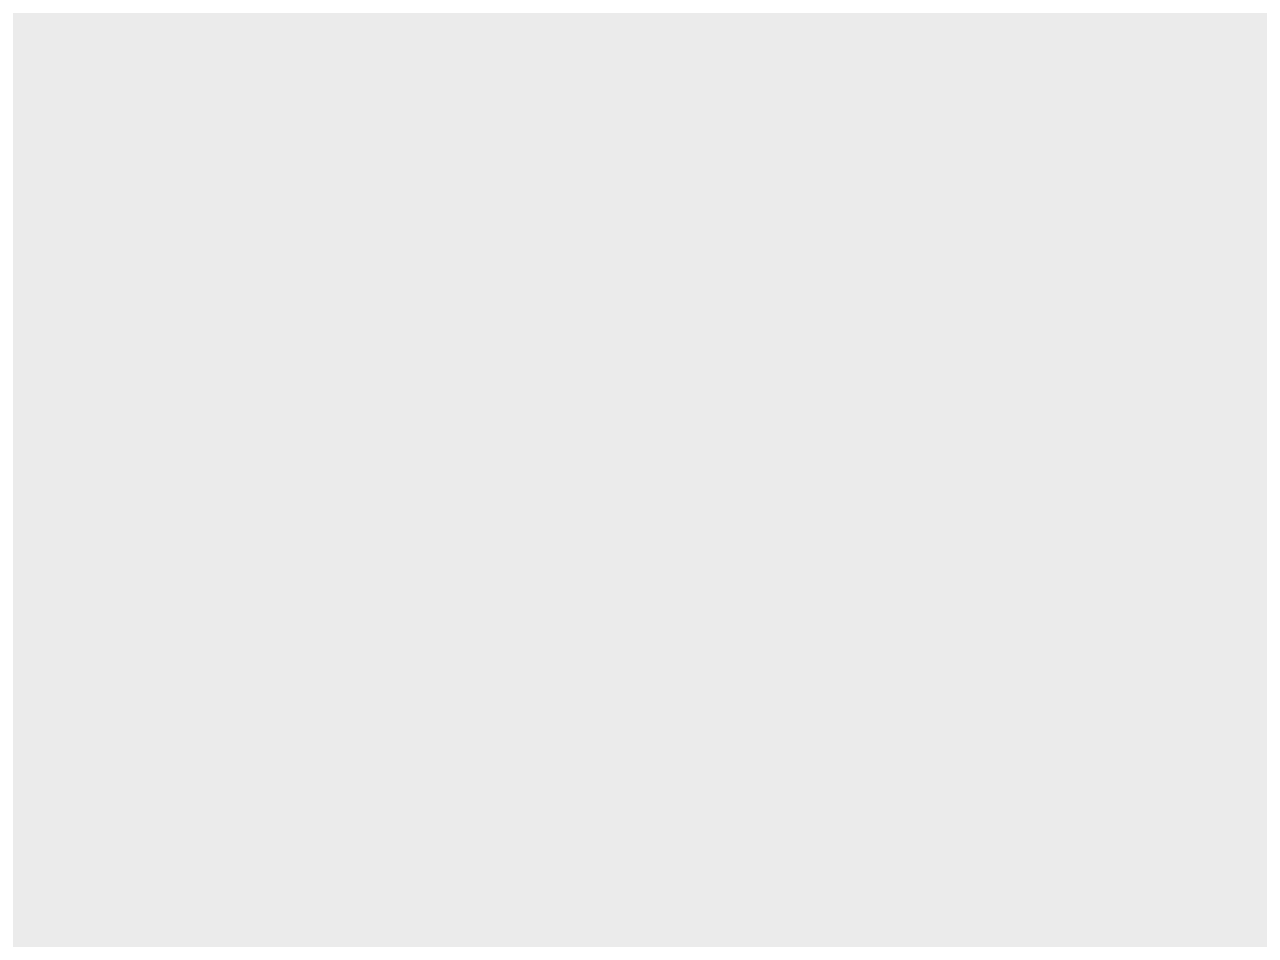

In [7]:
(p9.ggplot(data=penguin))

No plot - because we didn't _tell_ it to plot anything.  Let's tell it the variables - using `flipper_length_mm` column and the `body_mass_g` columns.  

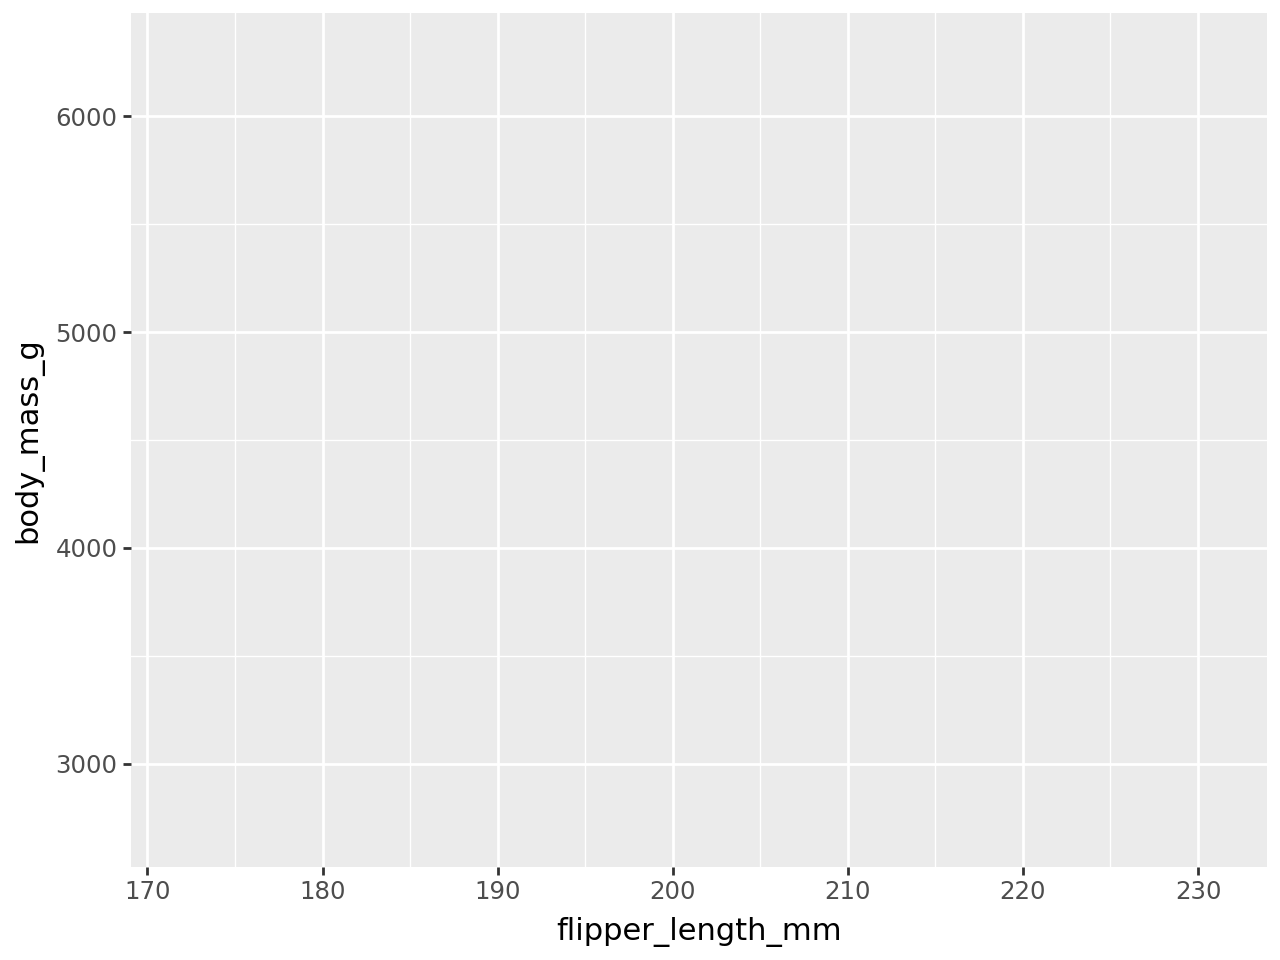

In [8]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='flipper_length_mm', y='body_mass_g')))

So we specify the "aesthetics" or aes to tell ggplot which variables there are.  But we still haven't told it to _plot_ the variables. Let's use `geom_point` <https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_point.html>

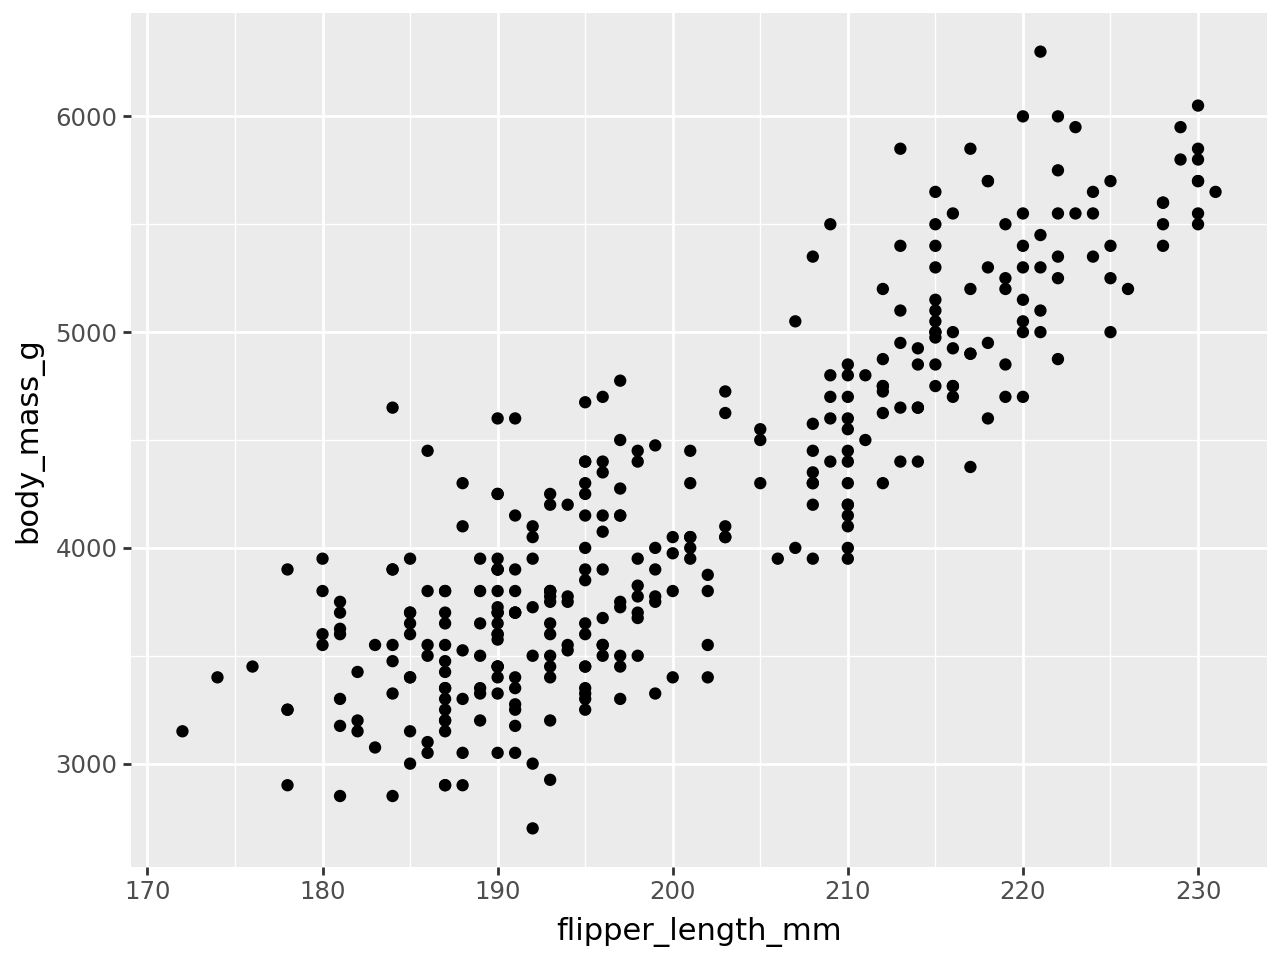

In [9]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='flipper_length_mm', y='body_mass_g')) + p9.geom_point())

So this is pretty good, we can see already that there is a roughly linear relationship between flipper length and body mass.  But how this look if we stratify or compare the species?  Is there a way we can look at that data simultaneously? Let's color code the points according to their species like so using `color`:

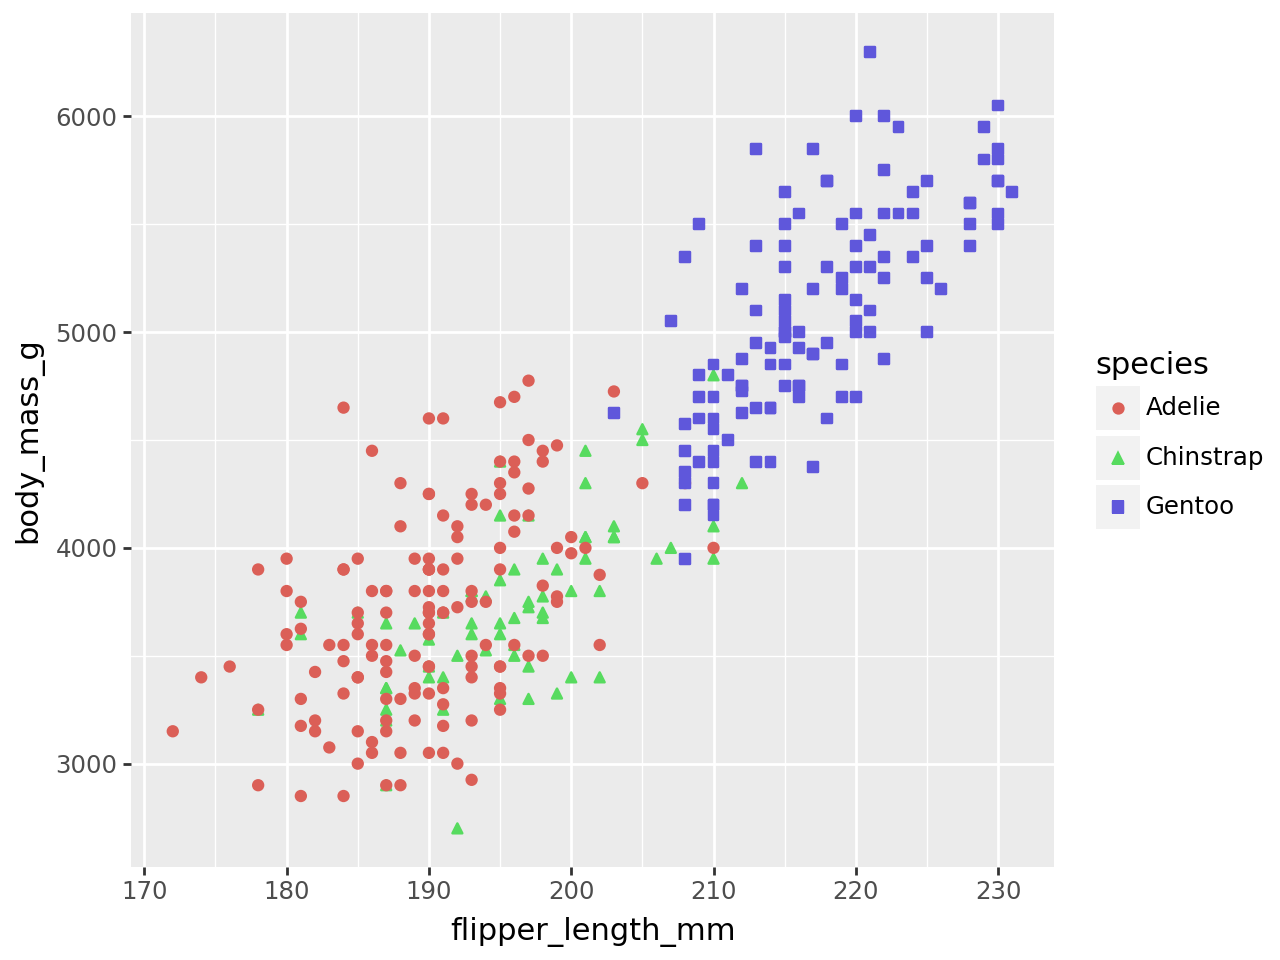

In [10]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='flipper_length_mm', y='body_mass_g', color='species', shape='species')) + p9.geom_point())

Pretty nice!  We could also make the markers different shapes by setting `style`

Ok - but some of the points are basically on top of each other, making it hard to see.  You can make them partially transparent by setting `alpha` which is the level of transparency - making sure we can see the points.

You'll note that there's some level of overplotting - one way to resolve that is to set the points to be partially transparent with `alpha`

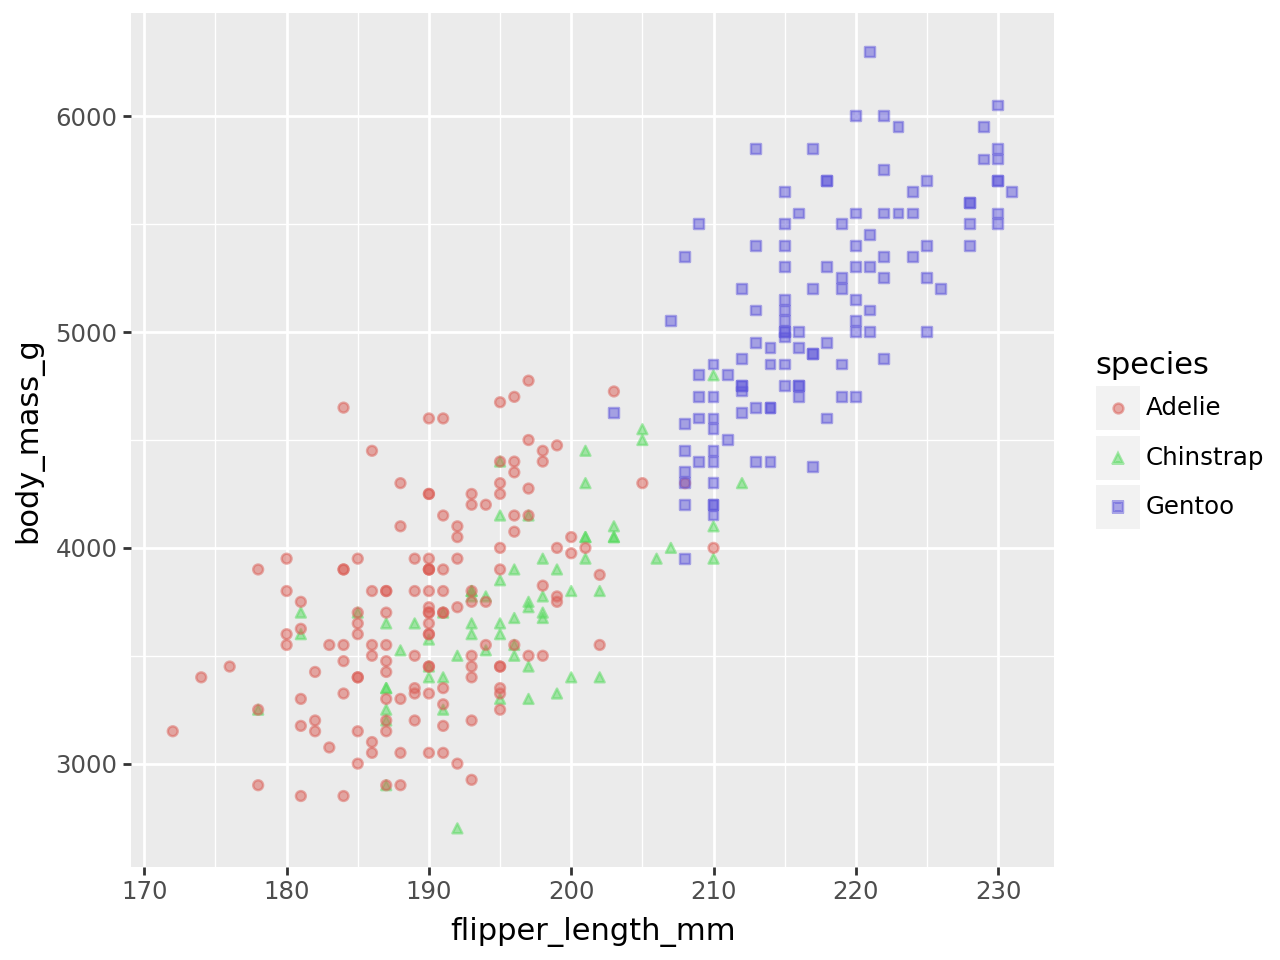

In [11]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='flipper_length_mm', y='body_mass_g', color='species', shape='species'))
 + p9.geom_point(alpha=.5))

But what if we have a more quantitative or "continuous" third variable instead of a "categorical" one - for example bill length. When you set color to this it tries to automatically scale the point color to the different bill lengths.

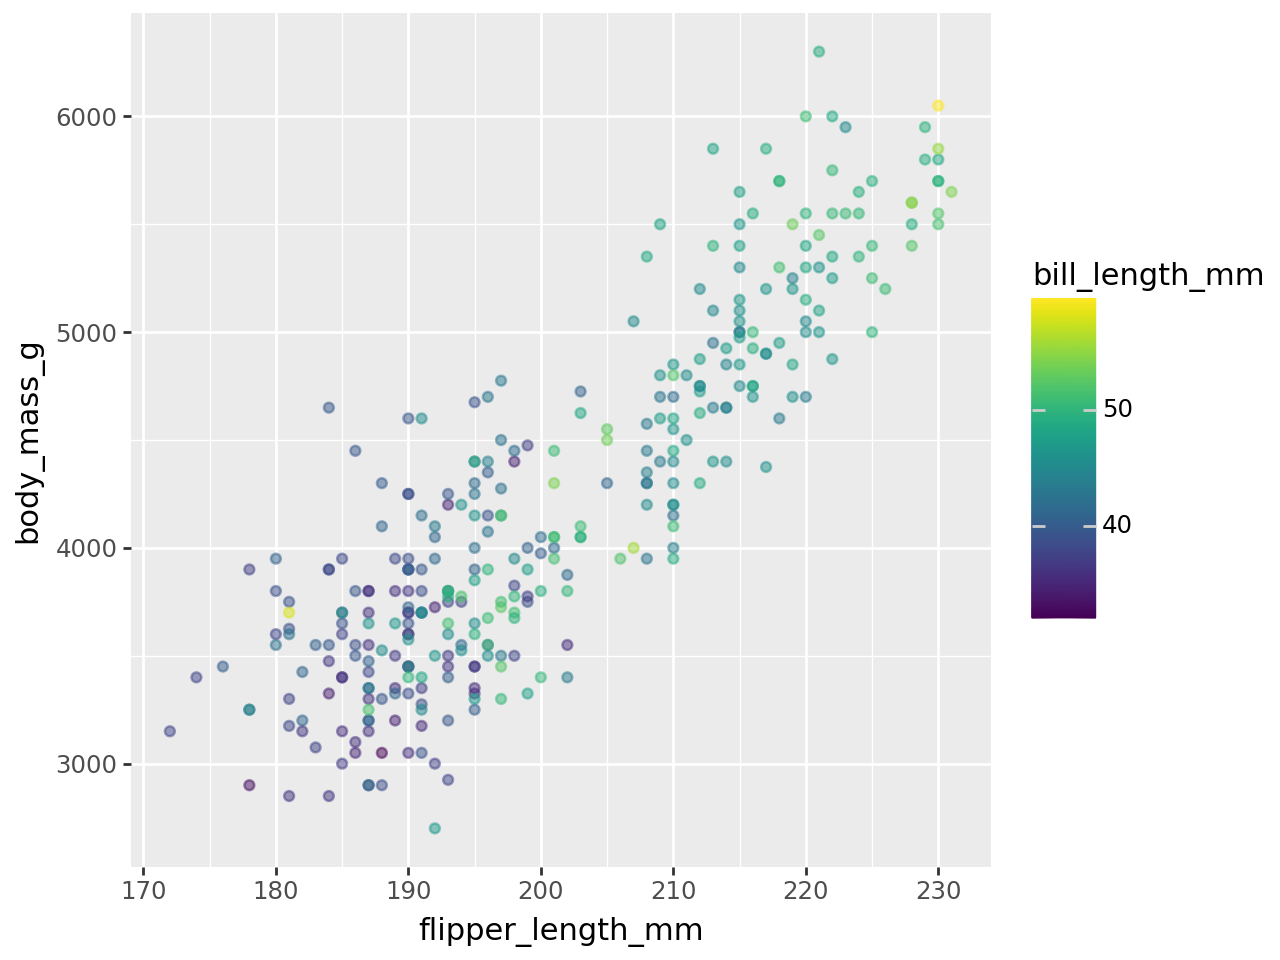

In [12]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='flipper_length_mm', y='body_mass_g', color='bill_length_mm')) + p9.geom_point(alpha=0.5))

We can even plot use `size` to plot the continuous variables

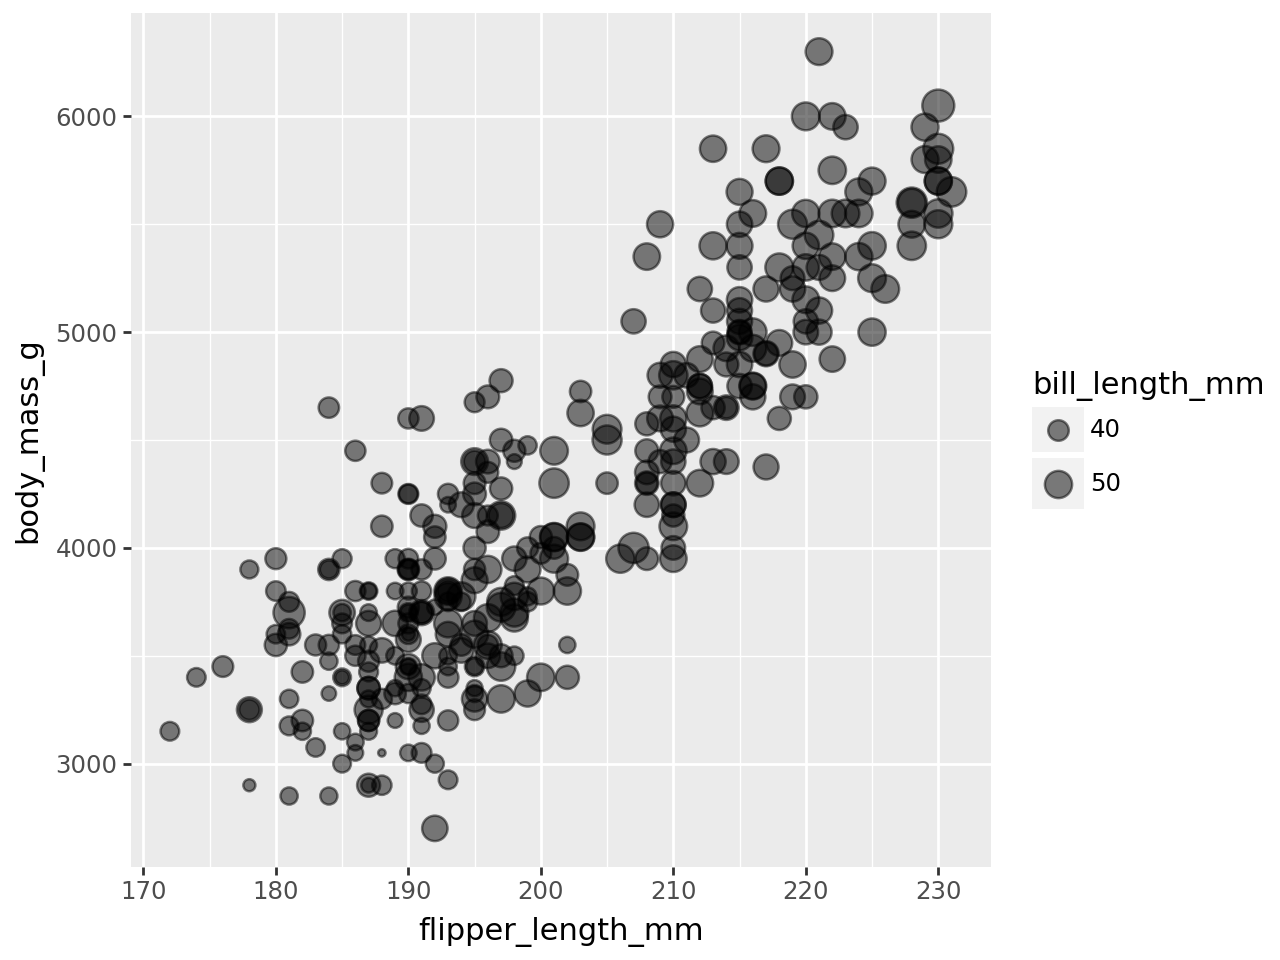

In [13]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='flipper_length_mm', y='body_mass_g', size='bill_length_mm')) + p9.geom_point(alpha=0.5))

What if we want to layer the species information on top of the rest of this?  We can try:

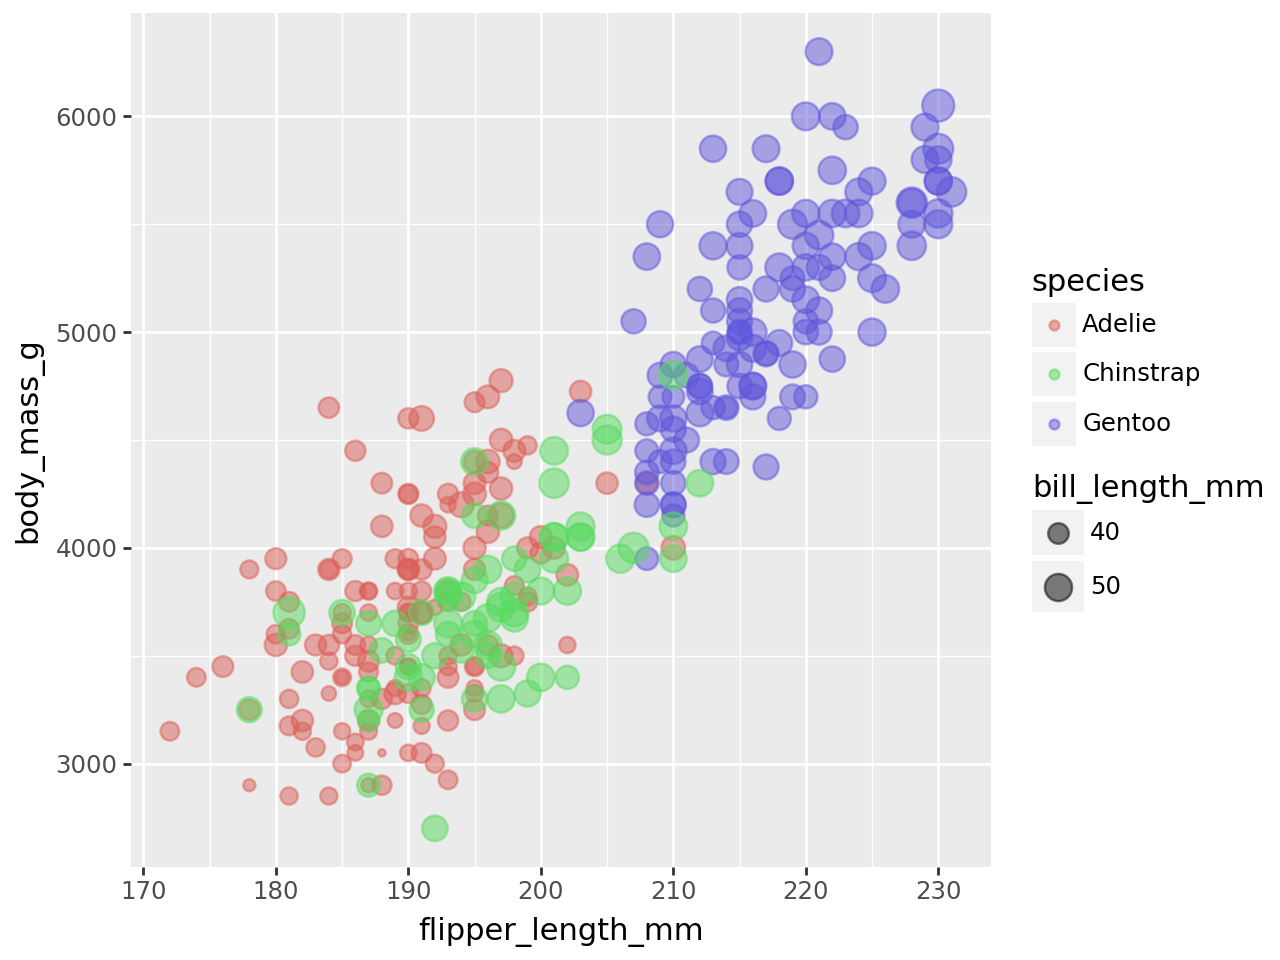

In [14]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='flipper_length_mm', y='body_mass_g', color='species', size='bill_length_mm')) + p9.geom_point(alpha=0.5))

But the problem is that the plot becomes too crowded to really understand the information.  Instead, we can **facet** the plots, we can do this by using `facet_wrap` - setting either the number of rows

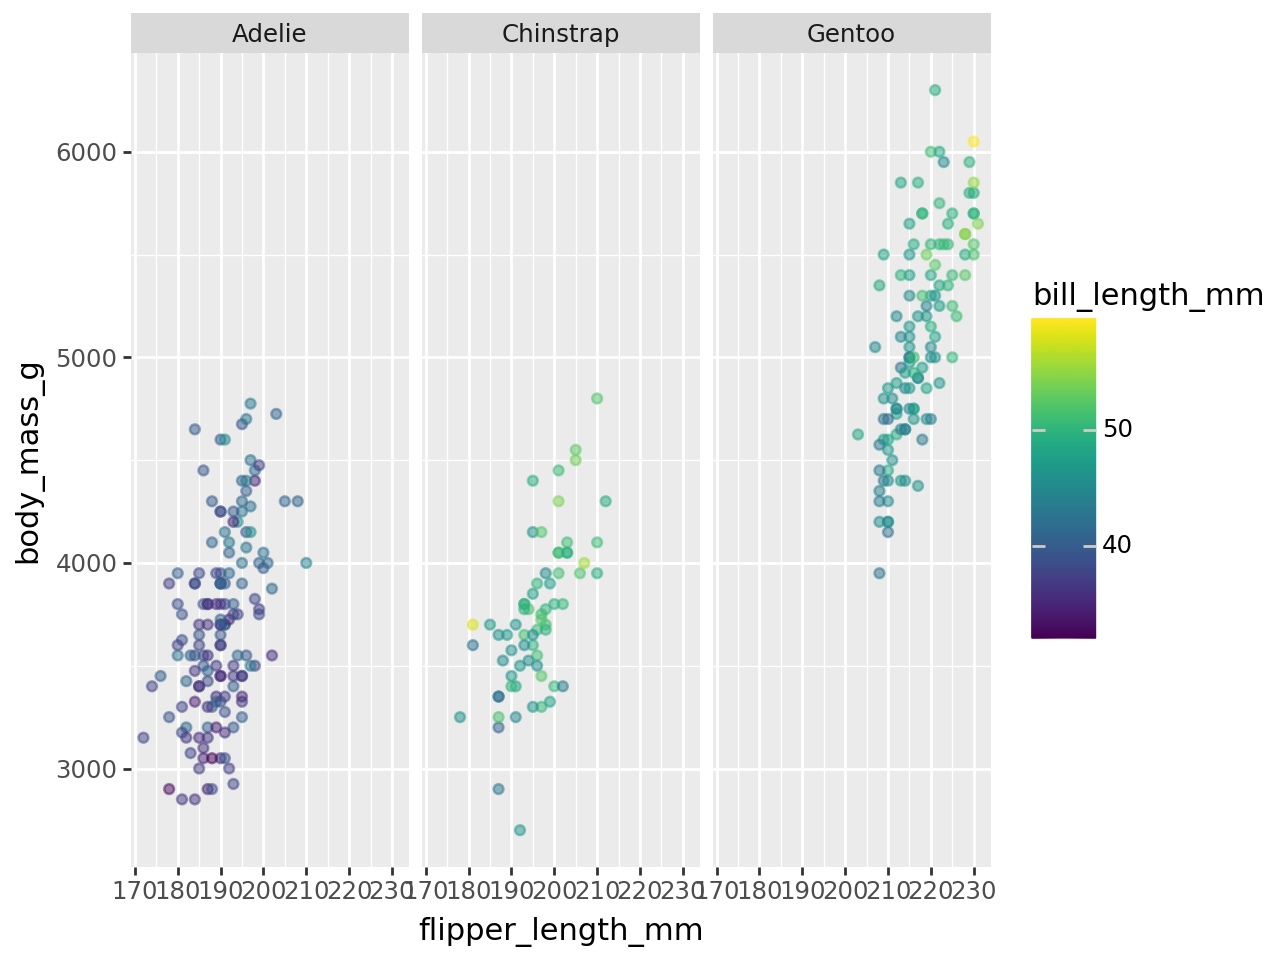

In [15]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='flipper_length_mm', y='body_mass_g', color='bill_length_mm')) + p9.geom_point(alpha=0.5) 
 + p9.facet_wrap('species', nrow=1))

Or columns

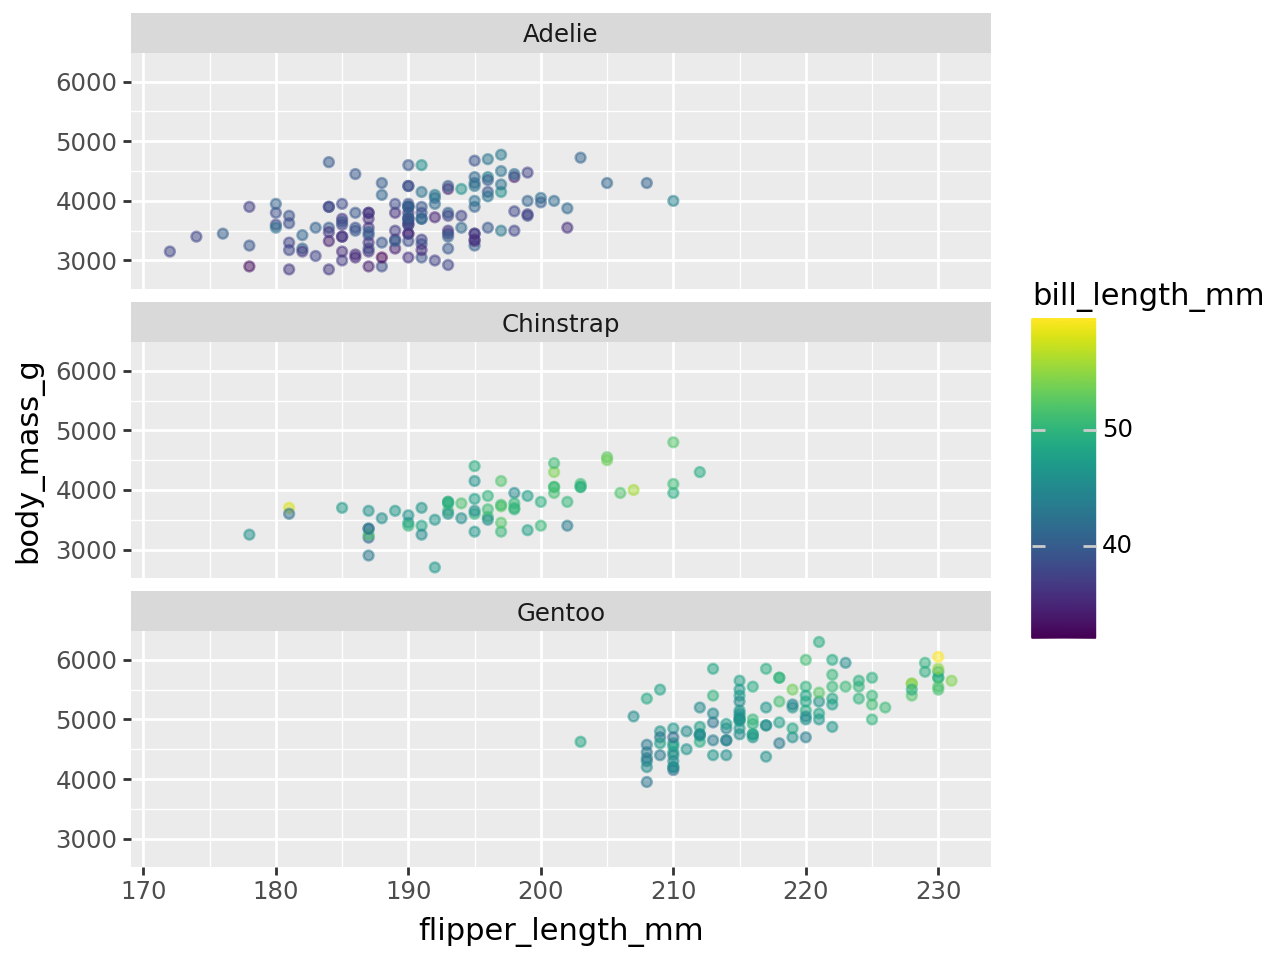

In [16]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='flipper_length_mm', y='body_mass_g', color='bill_length_mm')) + p9.geom_point(alpha=0.5) + p9.facet_wrap('species', ncol=1))

Even letting them wrap around:

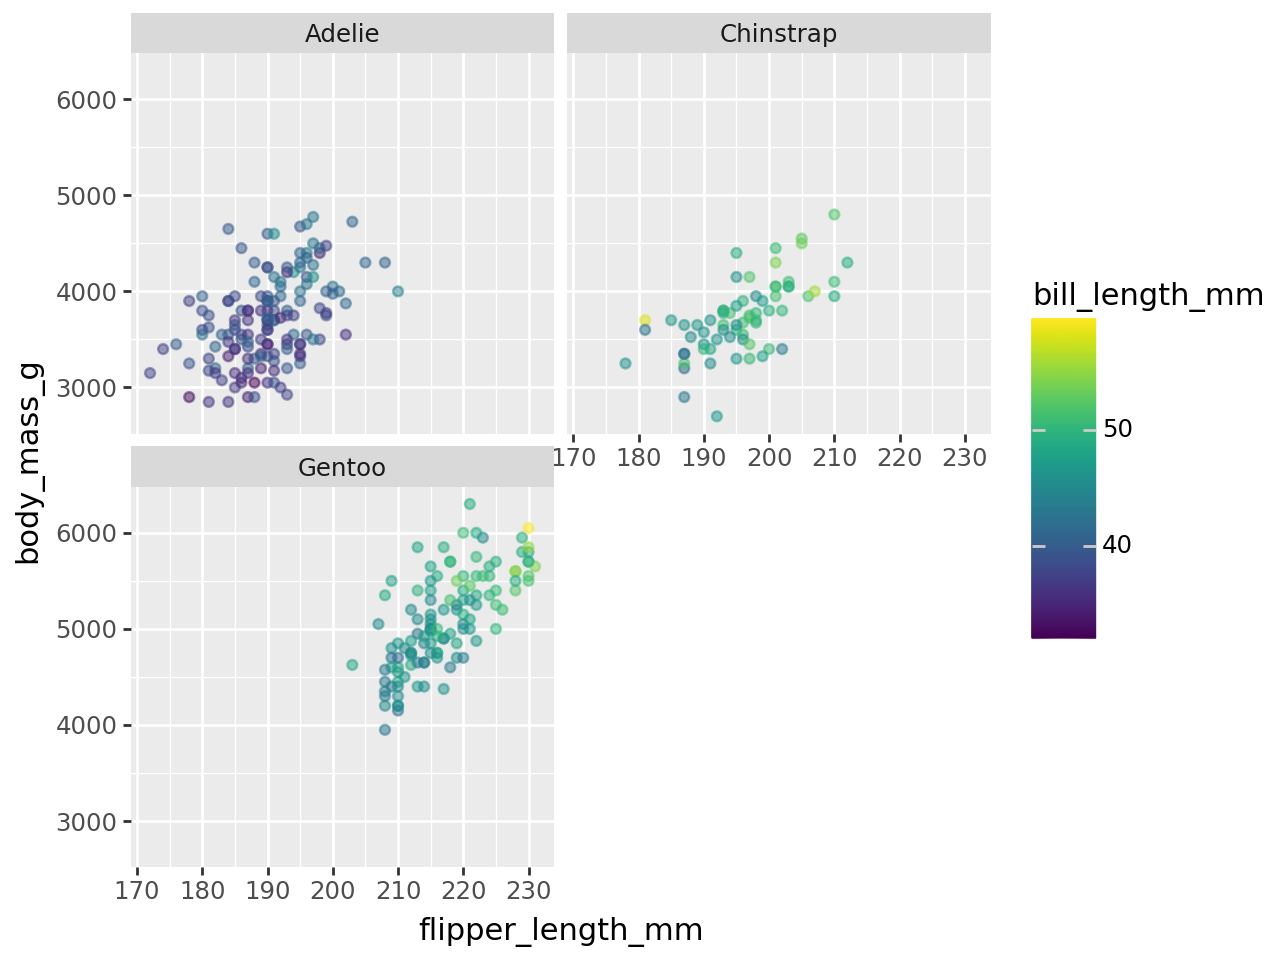

In [17]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='flipper_length_mm', y='body_mass_g', color='bill_length_mm')) + p9.geom_point(alpha=0.5) + p9.facet_wrap('species', ncol=2))

We can also fit lines to the data, using `geom_smooth` to perform a local polynomial regression:

/home/fzhong3/mambaforge/lib/python3.10/site-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/fzhong3/mambaforge/lib/python3.10/site-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/fzhong3/mambaforge/lib/python3.10/site-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


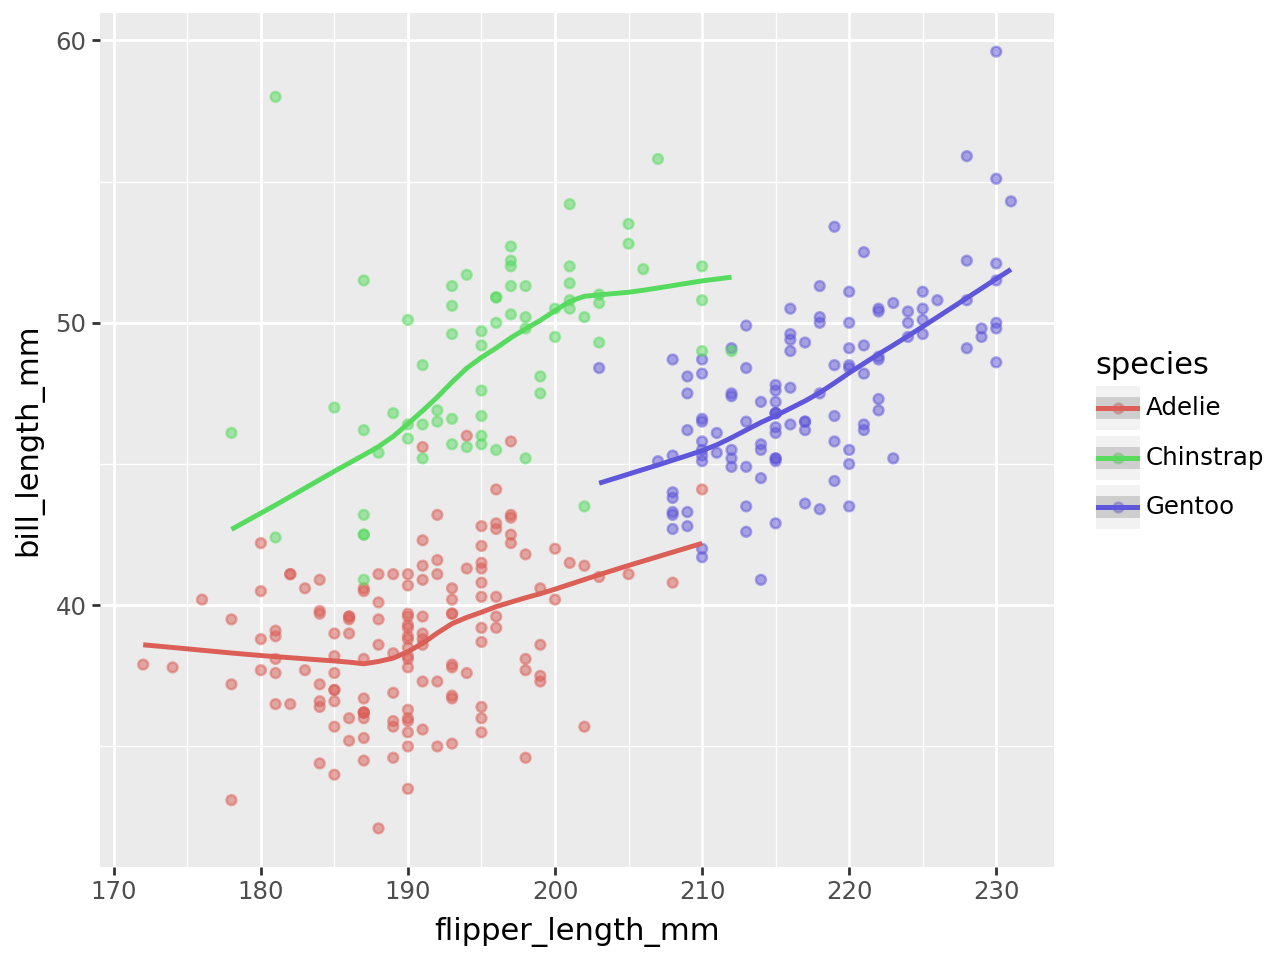

In [18]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='flipper_length_mm', y='bill_length_mm', color='species')) 
 + p9.geom_point(alpha=0.5) + p9.geom_smooth())

Or we can fit a linear model

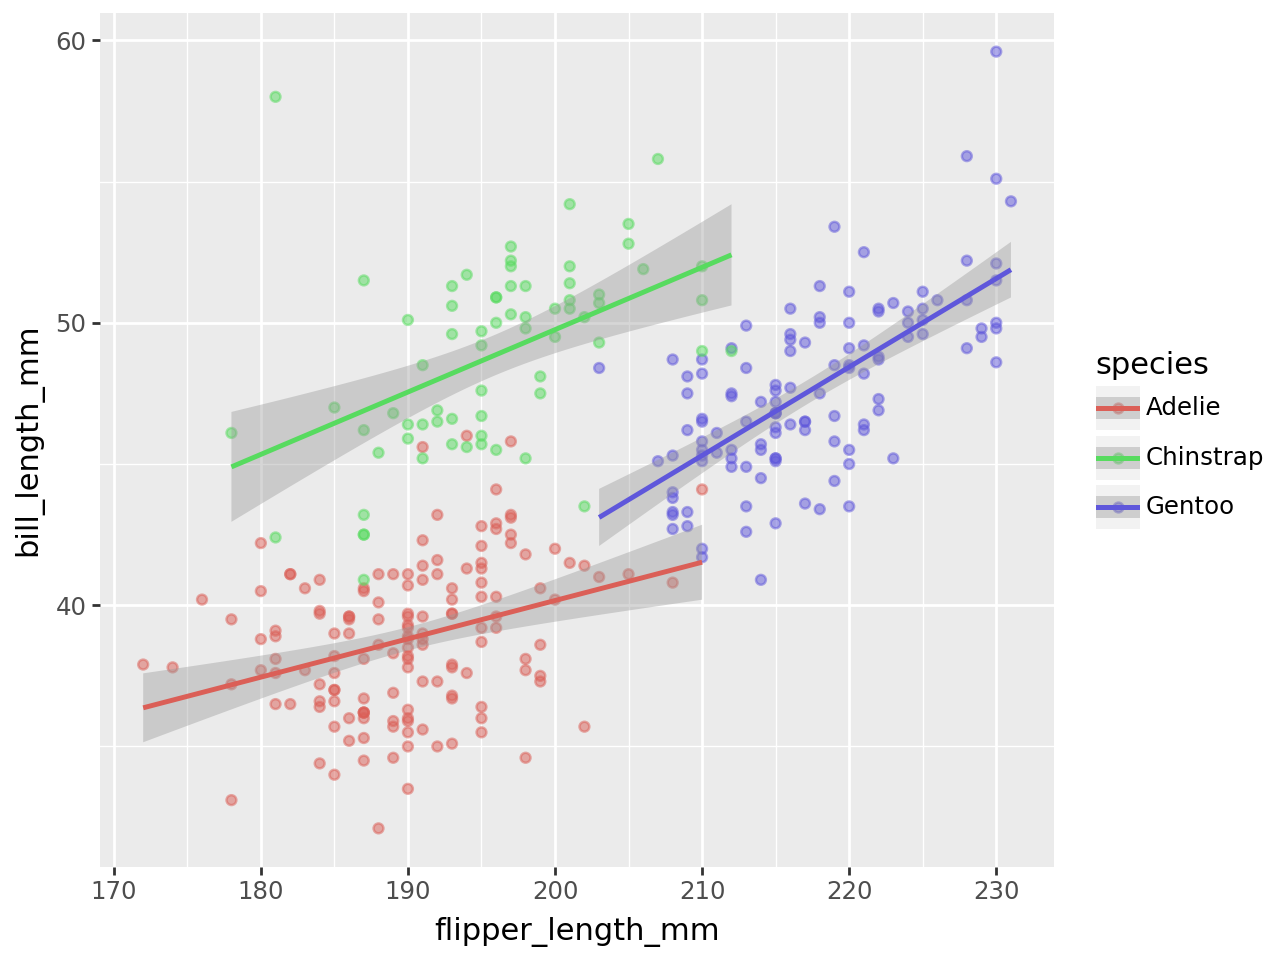

In [19]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='flipper_length_mm', y='bill_length_mm', color='species')) + p9.geom_point(alpha=0.5) + 
 p9.geom_smooth(method="lm"))

What if we just want to compare the _distributions_ of, say, flipper length between the different species? Plotting the difference between **categorical** variables instead of quantitative variables:

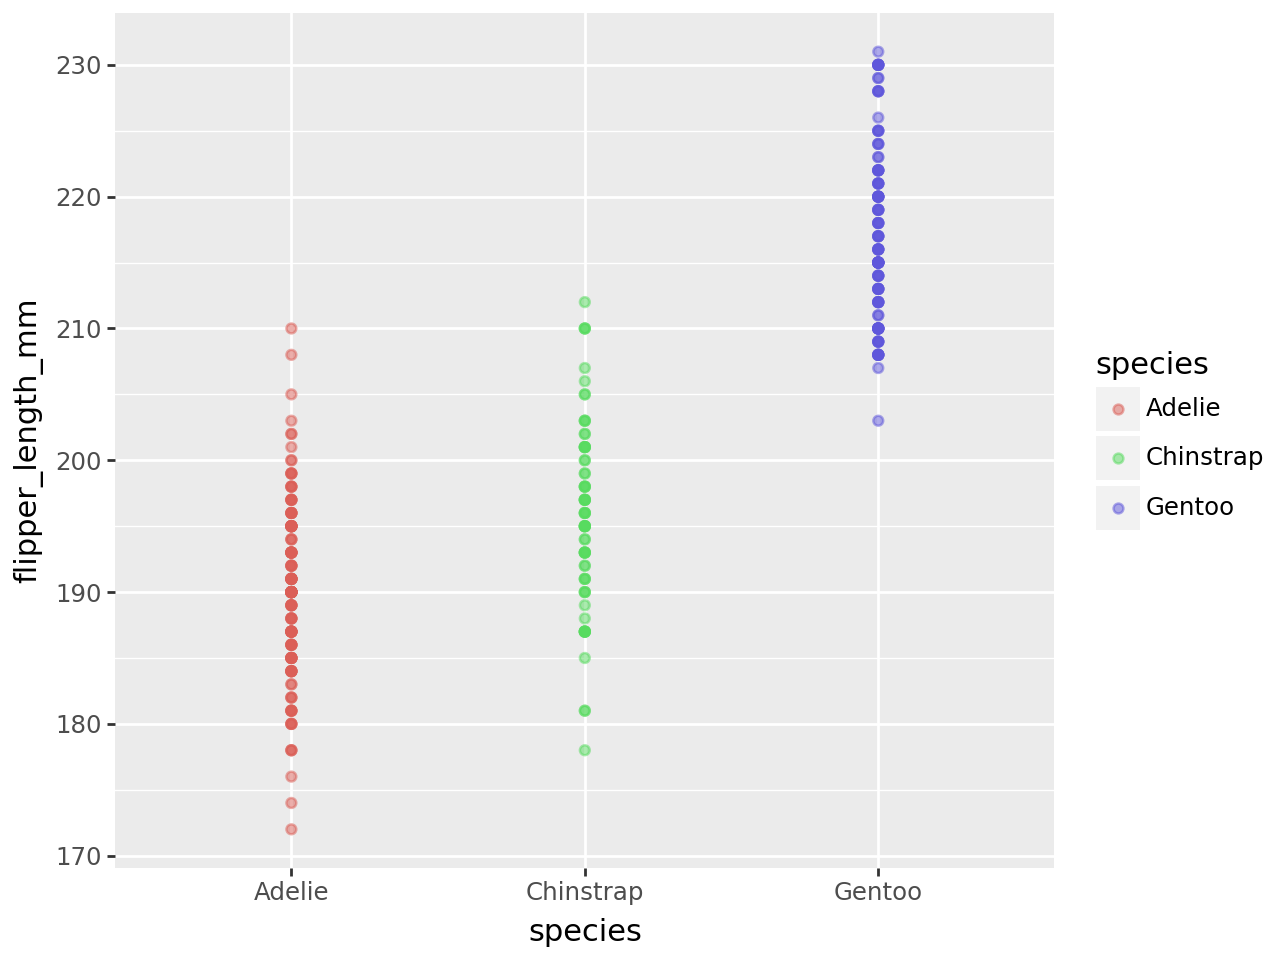

In [20]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='species', y='flipper_length_mm', color='species')) + p9.geom_point(alpha=0.5))

But even with alpha the overplotting is too much!  Let's add some "jitter" which moves the x values around to make it more visible:

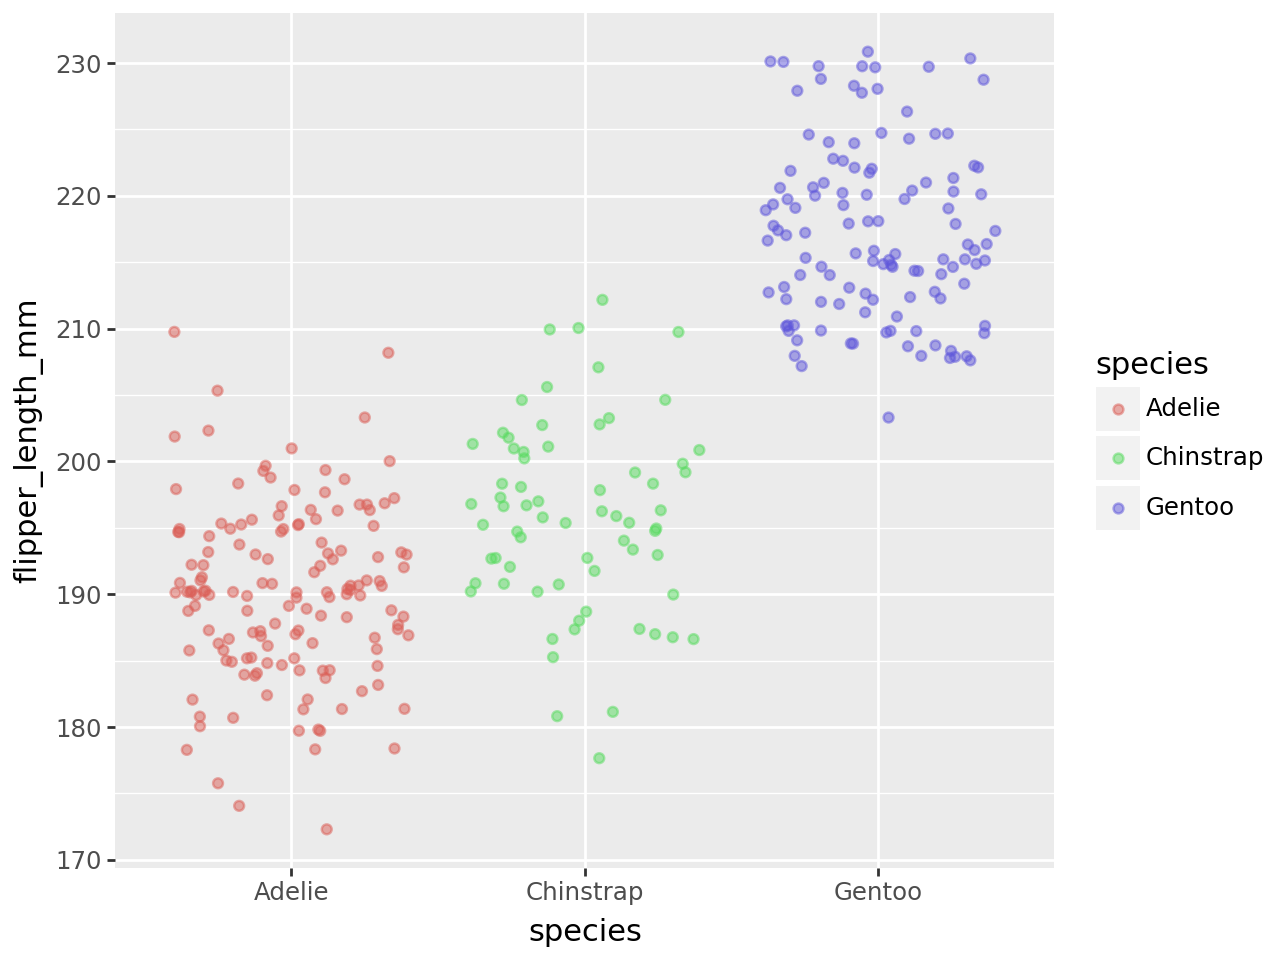

In [21]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='species', y='flipper_length_mm', color='species')) + p9.geom_jitter(alpha=0.5))

We can also try 

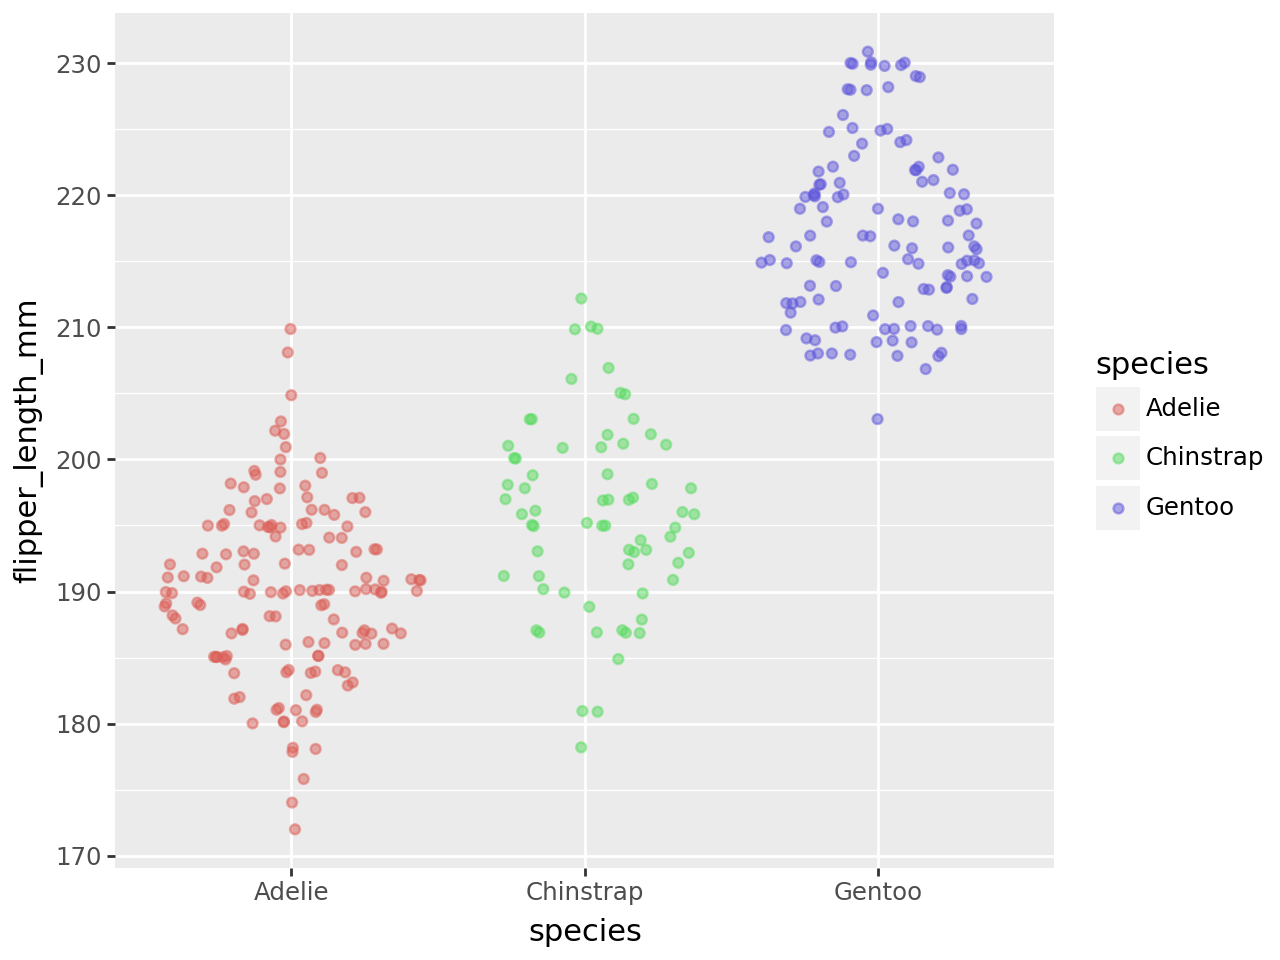

In [22]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='species', y='flipper_length_mm', color='species')) + p9.geom_sina(alpha=0.5))


The color is a little extraneous here - we could use that color for something else - how about using it for the penguin sex?

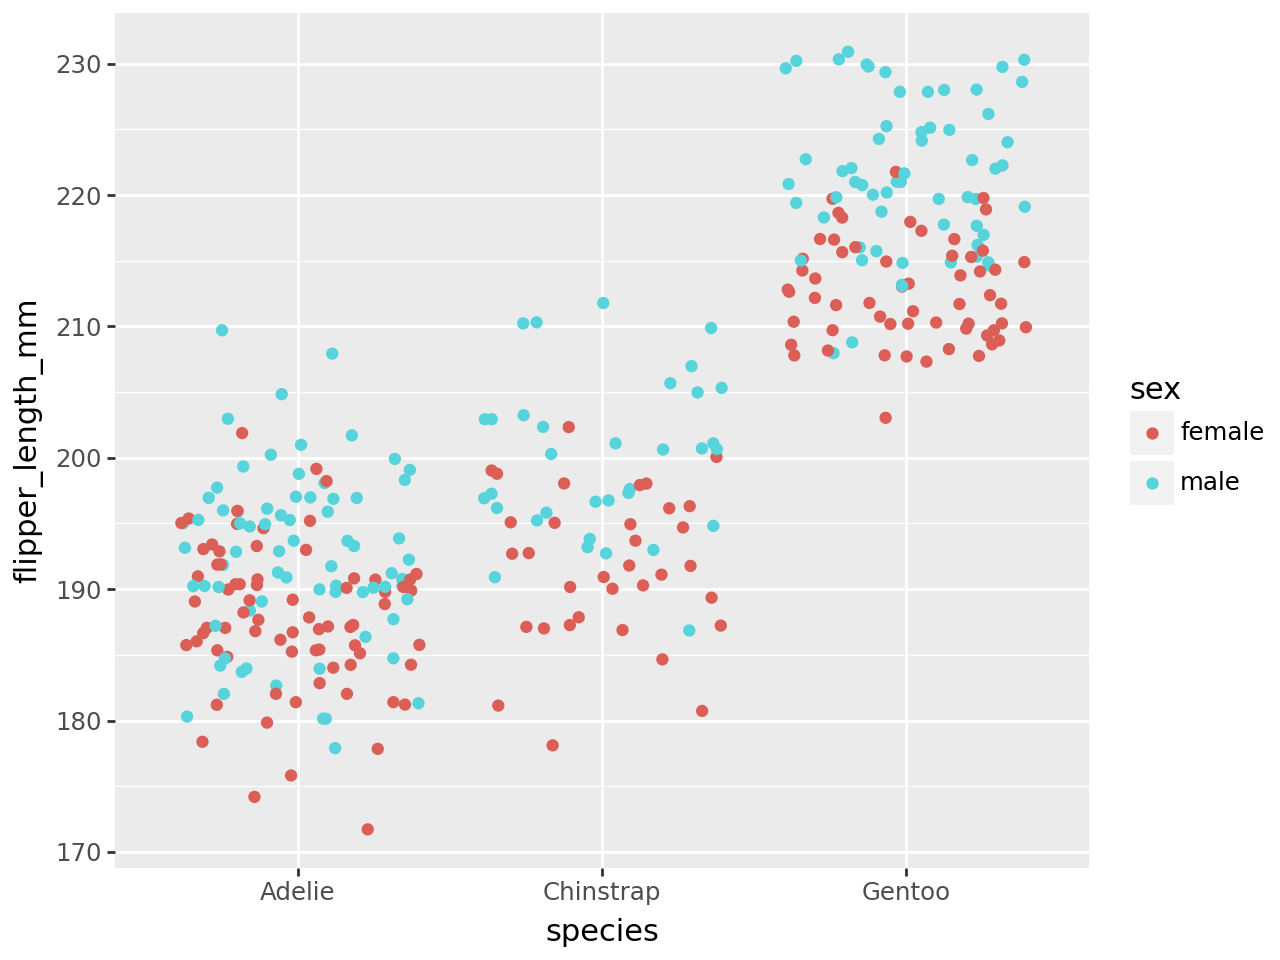

In [23]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='species', y='flipper_length_mm', colour='sex')) + p9.geom_jitter())

This has more information content - we can still see the differences in distribution between the species, but we can also see that the females have different flipper lengths than the males.   
We can also make the categorical axis the y-axis if we want instead:

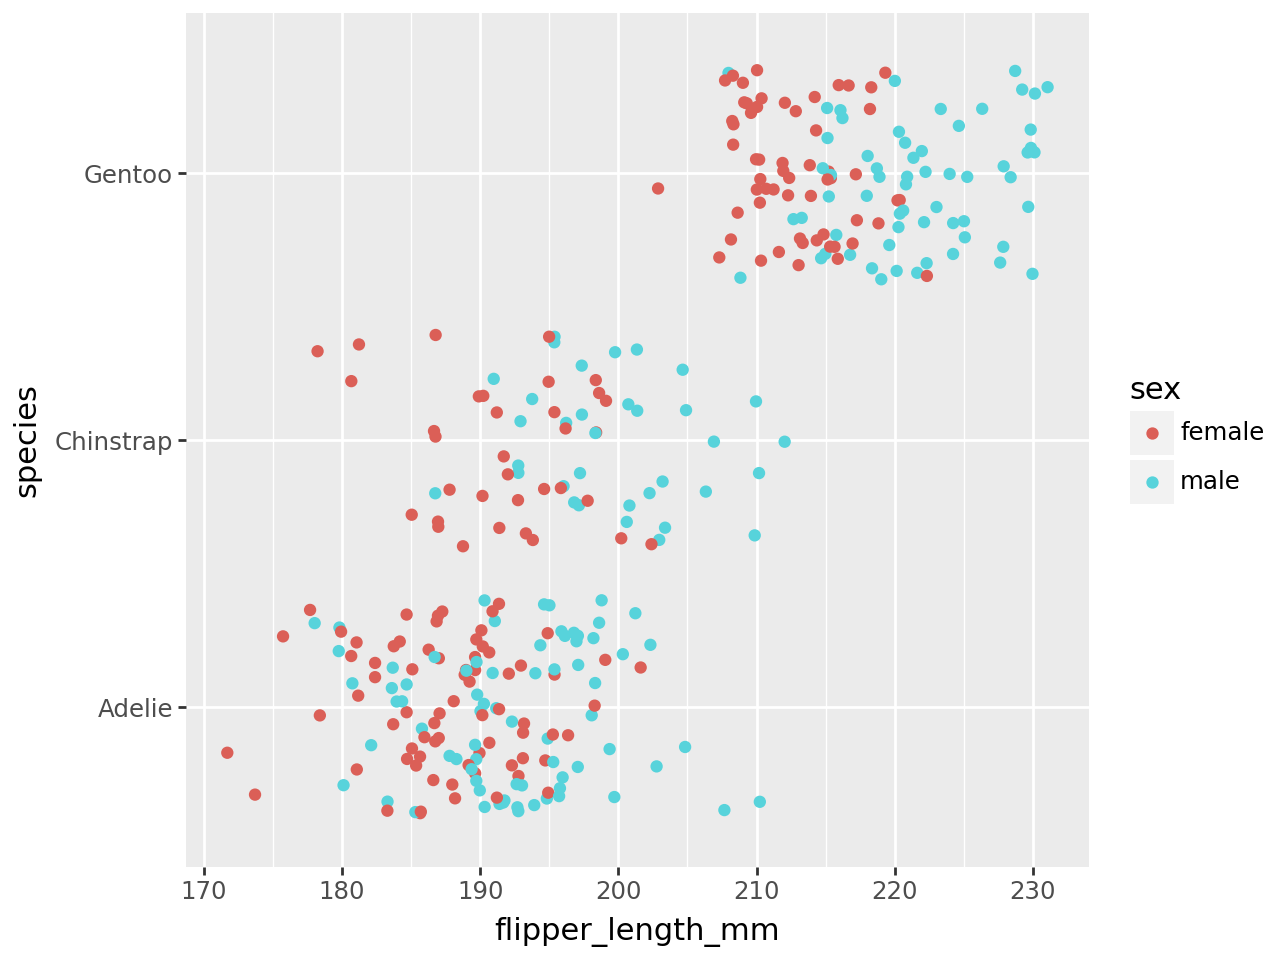

In [24]:
(p9.ggplot(data=penguin, mapping=p9.aes(y='species', x='flipper_length_mm', colour='sex')) + p9.geom_jitter())

Plotting the points is informative, but we may want to instead make a boxplot to better represent the distribution.  Boxplots have a box which show the 25th percentile to the 75th percentile of the data, with the "whiskers" showing 1.5 X the interquartile. We can just set this with `kind="box"`

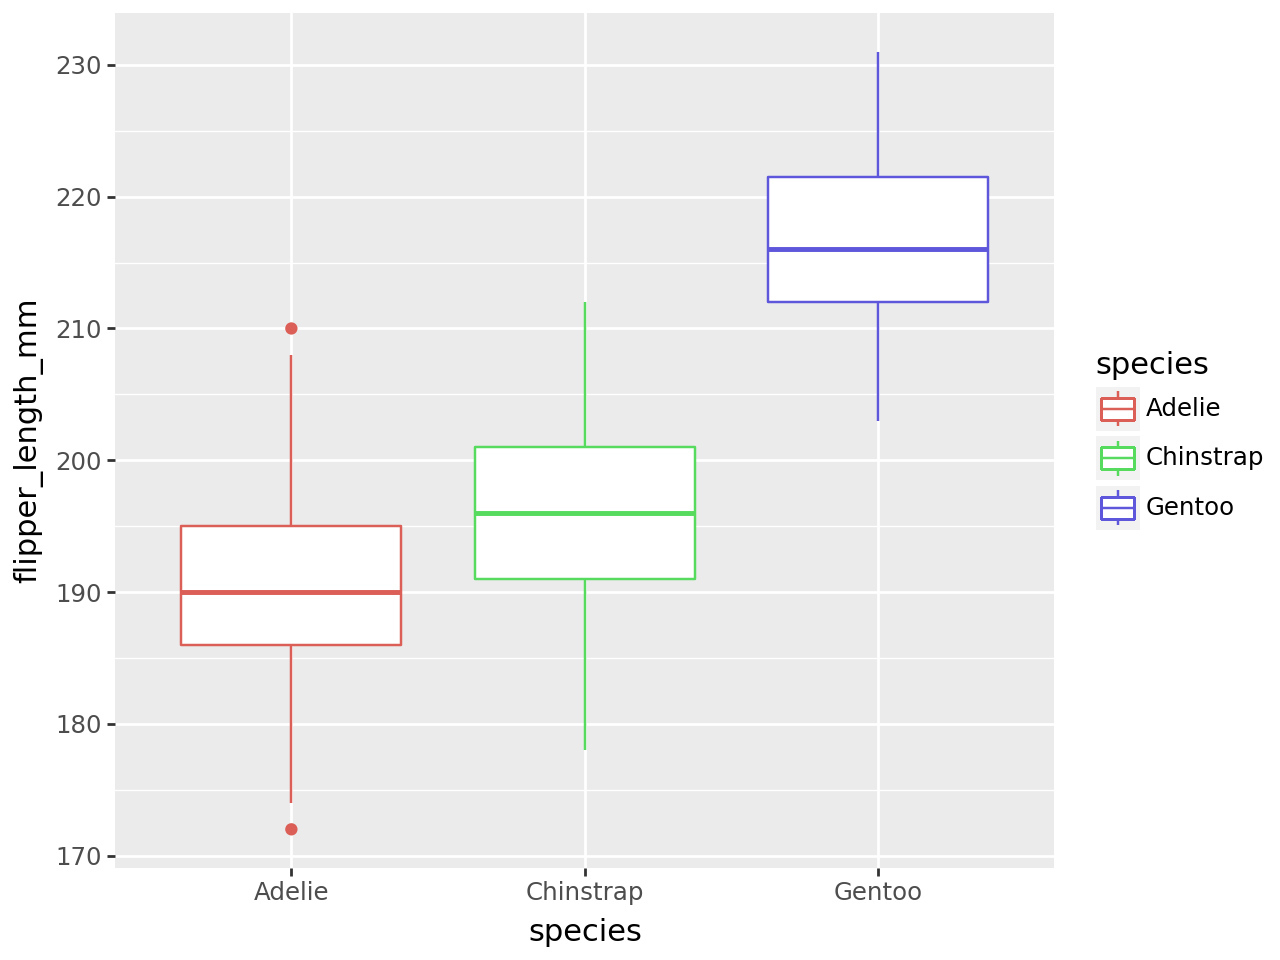

In [25]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='species', y='flipper_length_mm', color='species')) + p9.geom_boxplot())

And what happens if we try to color code by sex here?

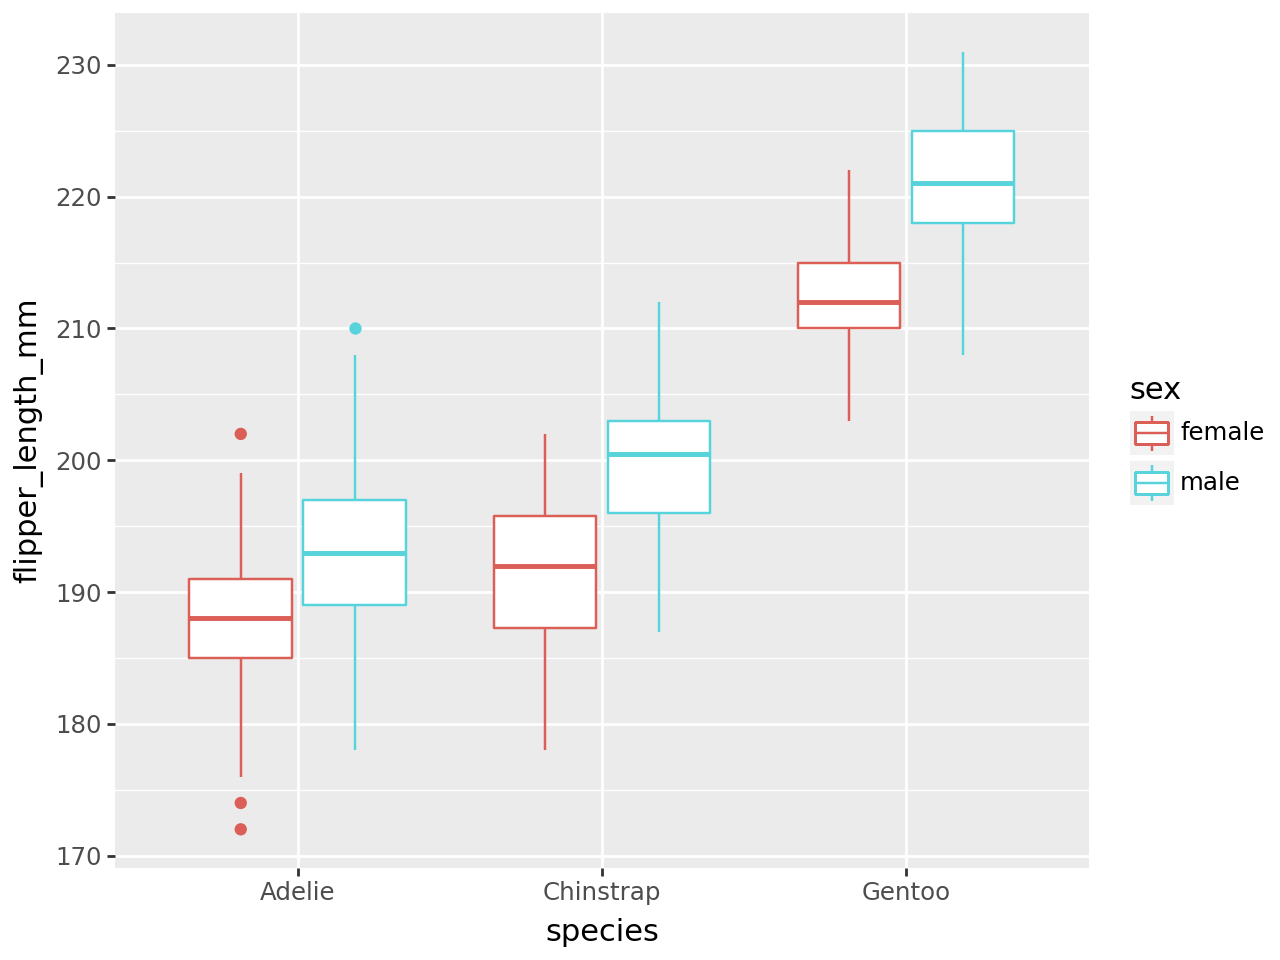

In [26]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='species', y='flipper_length_mm', color='sex')) + p9.geom_boxplot())

The boxes are automatically "dodged" or separated.  Here it becomes clear that male and female are pretty different in flipper length, and the different species are different as well.   Sometimes we might be interested in the distribution of the points, but still summarizing - for this we can use a "violin" plot - `geom_violin`:

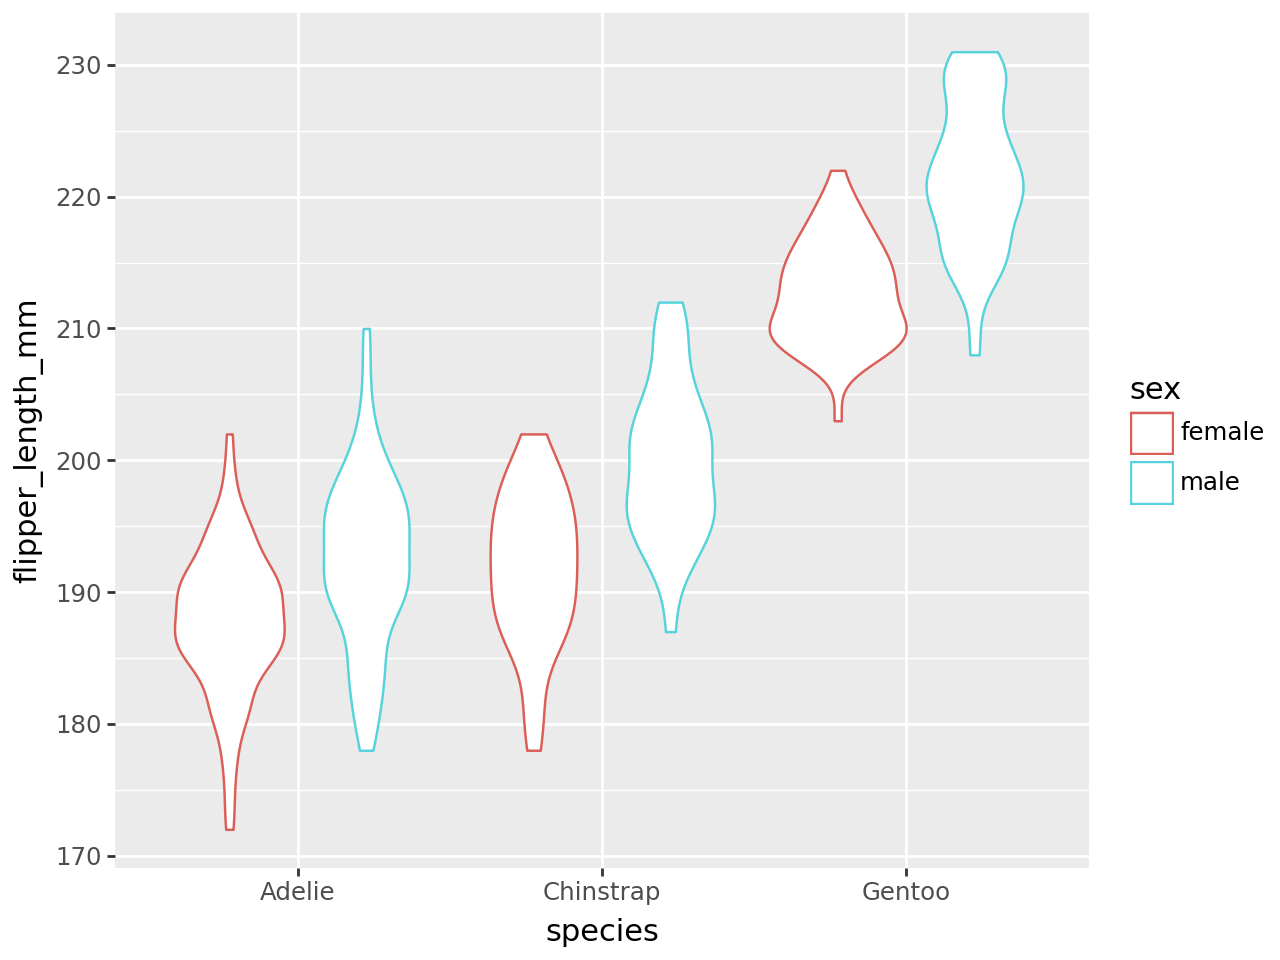

In [27]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='species', y='flipper_length_mm', color='sex')) + p9.geom_violin())

But if what if we want to _layer_ plots - like the sina plot _on top_ of the violin - can do it like this:

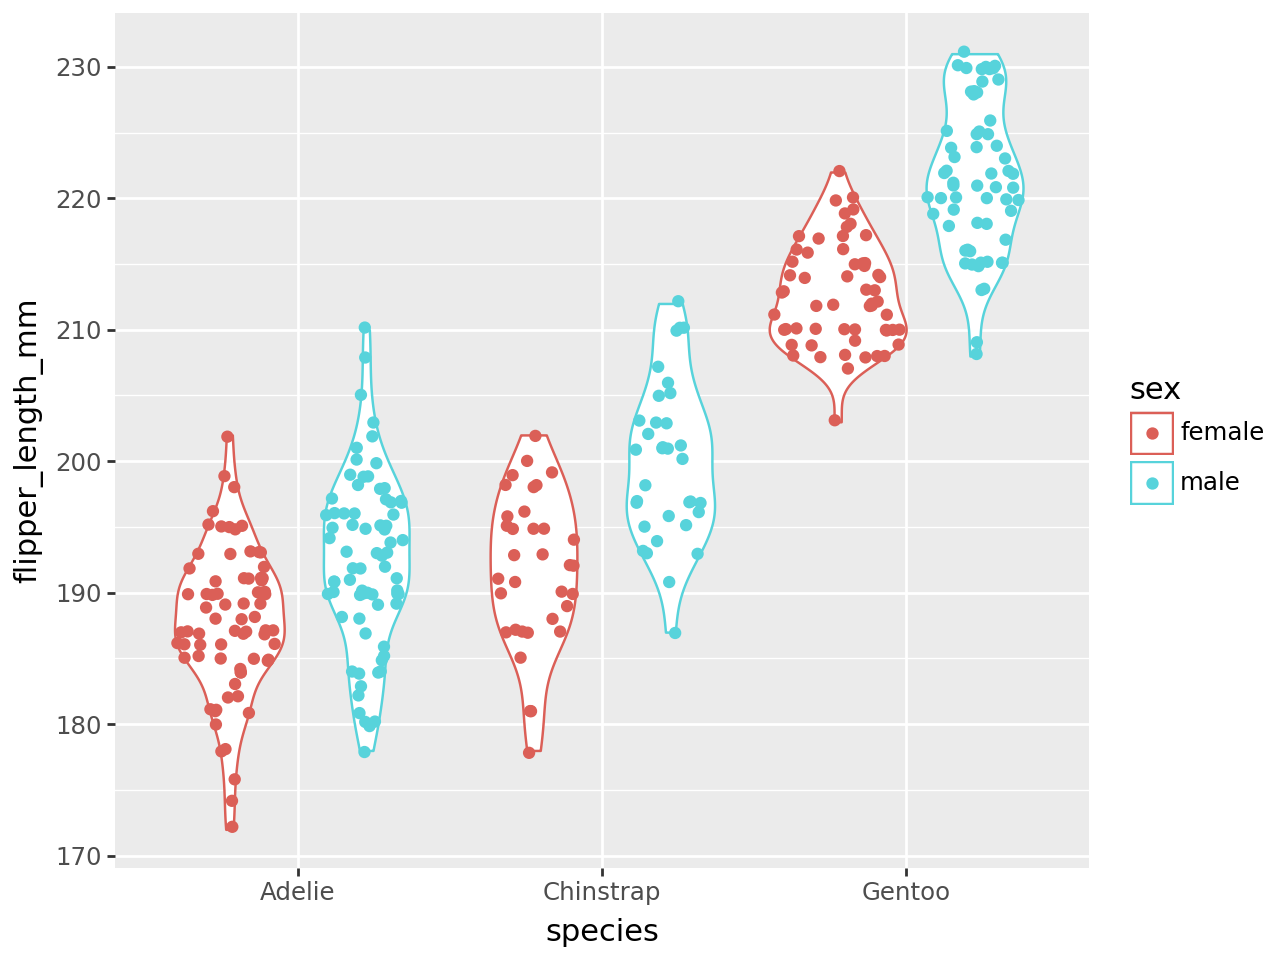

In [28]:
(p9.ggplot(data=penguin, mapping=p9.aes(x='species', y='flipper_length_mm', color='sex')) +
 p9.geom_violin()+ p9.geom_sina())